# Data Analyst Project

The <a href="http://www.seanlahman.com/baseball-archive/statistics/">Baseball Data</a> is used for data analyst in this project. The salary is choose as analysis object.

Question posed:
1. How the salary changing in these years?
2. What is the relationship between salary and different performance metrics? 
3. Are HomeRuns and Hits metrics influence players' salaries?
4. What is player's name with the highest salary?


## Load Data from CSVs

In [2]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
## Load data from the files which I interested with
## Read these data and store them in pandas' data frame.
file_path = 'baseballdatabank-master/core/'
Master = pd.read_csv(file_path + 'Master.csv')
Batting = pd.read_csv(file_path + 'Batting.csv')
Salaries = pd.read_csv(file_path + 'Salaries.csv')

In [4]:
## Look at the first row of Salaries and Batting dataframe
Salaries.head(1)

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000


In [5]:
Batting.head(1)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


## Dealing with Missing Data

In [7]:
## Look at value missing in each item column of batting table.
Batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101332 entries, 0 to 101331
Data columns (total 22 columns):
playerID    101332 non-null object
yearID      101332 non-null int64
stint       101332 non-null int64
teamID      101332 non-null object
lgID        100595 non-null object
G           101332 non-null int64
AB          96183 non-null float64
R           96183 non-null float64
H           96183 non-null float64
2B          96183 non-null float64
3B          96183 non-null float64
HR          96183 non-null float64
RBI         95759 non-null float64
SB          94883 non-null float64
CS          72729 non-null float64
BB          96183 non-null float64
SO          88345 non-null float64
IBB         59620 non-null float64
HBP         93373 non-null float64
SH          89845 non-null float64
SF          60151 non-null float64
GIDP        70075 non-null float64
dtypes: float64(16), int64(3), object(3)
memory usage: 17.0+ MB


In [207]:
## In the Batting dataframe, there are some metrics data missing.
## Such as, IgID, IBB, HBP, SH, SF, and GIDP from the above table.

## Count the number of value missing in each item column of batting table.
for column in Batting.columns:
    num = 0
    for value in pd.isnull(Batting[column]):
        if value == True:
            num += 1
    print  column, "value missing number is", num

playerID value missing number is 0
yearID value missing number is 0
stint value missing number is 0
teamID value missing number is 0
lgID value missing number is 737
G value missing number is 0
AB value missing number is 5149
R value missing number is 5149
H value missing number is 5149
2B value missing number is 5149
3B value missing number is 5149
HR value missing number is 5149
RBI value missing number is 5573
SB value missing number is 6449
CS value missing number is 28603
BB value missing number is 5149
SO value missing number is 12987
IBB value missing number is 41712
HBP value missing number is 7959
SH value missing number is 11487
SF value missing number is 41181
GIDP value missing number is 31256


In [225]:
## Count the number of value missing in each item column of Salaries table.
for column in Salaries.columns:
    num = 0
    for value in pd.isnull(Salaries[column]):
        if value == True:
            num += 1
    print  column, "value missing number is", num

yearID value missing number is 0
teamID value missing number is 0
lgID value missing number is 0
playerID value missing number is 0
salary value missing number is 0


In [215]:
## The teamID values missing occured before 1786, 
## which can be found in the original dataset in excel.

## Other data are missing at random, so analysing only the available data here.
## Remove any index with performance metrics data missing using DataFrame.dropna.
Batting_non_null = Batting.dropna(axis=0, how='any')
len(Batting_non_null)

59544

In [218]:
## Look at the first row of dropna batting data.
Batting_non_null.head(1)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
4560,colemjo02,1890,1,PHI,NL,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Dependent Variable Analysis

In [219]:
## Merge Salaries and Batting dropna dataframe to investigate 
## the relationship between salary and performance metrics.
Salaries_Batting = Salaries.merge(Batting_non_null, how='inner')
Salaries_Batting.head(1)

,yearID,teamID,lgID,playerID,salary,stint,G,AB,R,H,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,1985,ATL,NL,barkele01,870000,1,20,17.0,0.0,0.0,...,0.0,0.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0


In [220]:
# The fixed dataset length
len(Salaries_Batting)

22749

In [314]:
## Looking at some dependent variables to find whether thare are anomalies, 
## such as outliers, skewed distributions, in them.

def evalute_data(items_evaluted):
    """Print summary statistics about the data and make histograms. (mean, Standard deviation, min, and max)"""
    print 'Mean:', np.mean(items_evaluted)
    print 'Std:', np.std(items_evaluted)
    print 'Min/Max:', np.min(items_evaluted) ,"/", np.max(items_evaluted)
    print 'Median:', np.median(items_evaluted)

Mean: 2144725.57022
Std: 3437858.14798
Min/Max: 0 / 33000000
Median: 600000.0


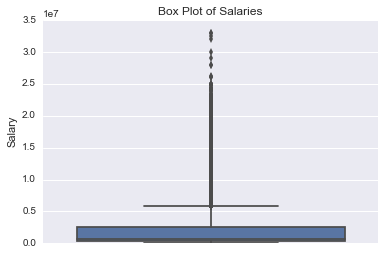

In [315]:
## Box plot of salaryies
sns.boxplot(Salaries_Batting.salary, orient = 'v')
plt.title('Box Plot of Salaries')
plt.ylabel('Salary')
evalute_data(Salaries_Batting.salary)

The box plot reveals that there are many definite outliers for salaries. The mean salaries are influenced considerably, not explain global salaries trend.

Mean: 5.52340762231
Std: 8.88612636081
Min/Max: 0.0 / 73.0
Median: 1.0


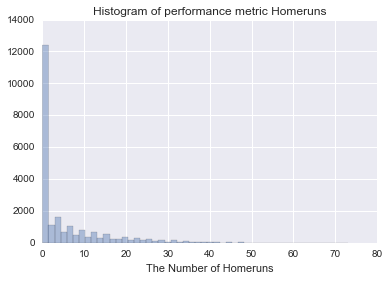

In [316]:
## Histogram of performance metric Homeruns (HR)
evalute_data(Salaries_Batting.HR)
sns.distplot(Salaries_Batting.HR, kde=False)
plt.title('Histogram of performance metric Homeruns')
plt.xlabel('The Number of Homeruns')

The data distribution is Extremely skewed. player's number drops dramatically at 1, and then decreases with the HR number increases. This trend makes sense in the real world. Few of players need homeruns, of whom the higher HR number, the less players can do that.  

Mean: 49.4451624247
Std: 58.680515606
Min/Max: 0.0 / 262.0
Median: 19.0


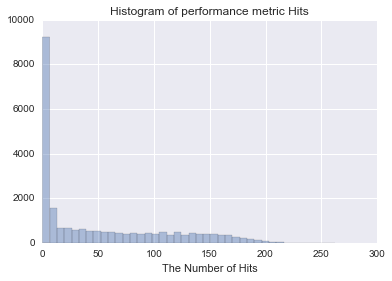

In [317]:
## Histogram of performance metric Hits (H)
evalute_data(Salaries_Batting.H)
sns.distplot(Salaries_Batting.H, kde=False)
plt.title('Histogram of performance metric Hits')
plt.xlabel('The Number of Hits')

This trend is quite similar with above one. But the decrease trend is more smooth after the H number 1. 

## Multiple Variable Analysis

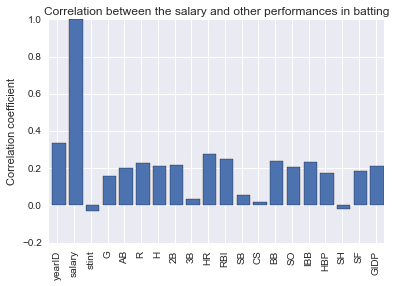

In [320]:
## To investigate the relationship between salary and performance metrics in batting table, the correlation coefficient is calculated.

corr_Salaries_Batting = Salaries_Batting.corr(method='pearson')

x_axis = [i + 0.2 for i, _ in enumerate(corr_Salaries_Batting)]
plt.bar(x_axis, corr_Salaries_Batting.salary)
plt.xticks([i + 0.5 for i, _ in enumerate(corr_Salaries_Batting)],
           corr_Salaries_Batting, rotation=90)
plt.ylabel("Correlation coefficient")
plt.title('Correlation between the salary and other performances in batting')

In this figure, we can find that the year, HR, and RBI have higher correlation coeffient than other factors in terms of salary.

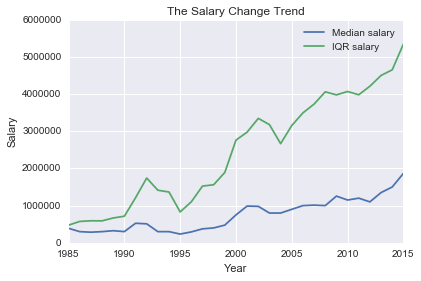

In [322]:
## Group the data by year to look at the relation between year and salary.
## We have known that there are many outliers in salaries values in front analysis, so the median and IQR standards are used.

grouped_by_year = Salaries_Batting.groupby('yearID', as_index = False)

median_salary_each_year = grouped_by_year.median()
iqr_salary_each_year = grouped_by_year.quantile(.75) - grouped_by_year.quantile(.25)
plt.plot(median_salary_each_year.yearID, median_salary_each_year.salary, label='Median salary')
plt.plot(median_salary_each_year.yearID, iqr_salary_each_year.salary, label='IQR salary')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Salary")
plt.title("The Salary Change Trend")

The salary increases as a whole in these years, except the periods of 1992-1995 and 2002-2004 have a slightly downward trend. IQR salary increases more obviously than median salary.

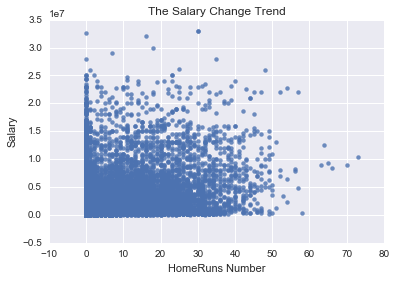

In [335]:
## Plot the relationship between salary and homeruns numbers.
sns.regplot(Salaries_Batting.HR, Salaries_Batting.salary, fit_reg = False)
plt.xlabel("HomeRuns Number")
plt.ylabel("Salary")
plt.title("The Salary Change Trend")

In this figure, it is hard to find a linear correlation between HR number and salary. The players, who have a very high HR number, only have a median salary.

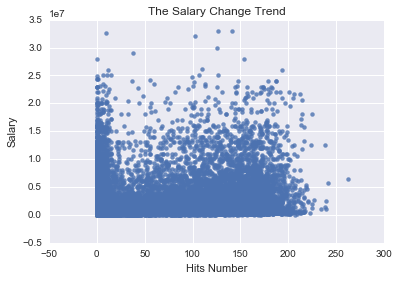

In [338]:
## Plot the relationship between salary and hits numbers.
sns.regplot(Salaries_Batting.H, Salaries_Batting.salary, fit_reg = False)
plt.xlabel("Hits Number")
plt.ylabel("Salary")
plt.title("The Salary Change Trend")

In the same, it is hard to find a linear correlation between H number and salary  in this figure.

## Find The Highest Salary Player

In [339]:
## Merge Salaries and Master dataframes
Master_Salaries_players = Salaries.merge(Master, on=['playerID'], how='inner')
Master_Salaries_players.head(1)

,yearID,teamID,lgID,playerID,salary,birthYear,birthMonth,birthDay,birthCountry,birthState,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,1985,ATL,NL,barkele01,870000,1955.0,7.0,27.0,USA,KY,...,Barker,Leonard Harold,225.0,77.0,R,R,1976-09-14,1987-09-26,barkl001,barkele01


In [16]:
## Get the information of the player with highest salary
## Highest_salary_player --> HSP
info_HSP = Master_Salaries_players.sort_values('salary', axis = 0, ascending=False).iloc[0]

slaray_HSP = info_HSP['salary']
name_HSP = info_HSP['nameFirst'] + " " + info_HSP['nameLast']
weight_HSP = info_HSP['weight']
heigh_HSP = info_HSP['height']
is_alive_HSP = info_HSP['deathMonth'] not in range(1,13) # death month not in 1-12 is alive.
yearID_HSP = info_HSP['yearID']
average_salary = salary_mean.iloc[yearID_HSP-1985]['salary']

print "Information of the highest salary player:"
print "Name: ", name_HSP
print "Weight: ", weight_HSP
print "Heigh: ", heigh_HSP
print "Is alive?: ", is_alive_HSP
print "His salary: ", slaray_HSP
print "The average salary in year",yearID_HSP, ": ",average_salary

Information of the highest salary player:
Name:  Alex Rodriguez
Weight:  225.0
Heigh:  75.0
Is alive?:  True
His salary:  33000000
The average salary in year 2009 :  3277646


The highest salary player's name is Alex Rodriguez, his weight is 225.0, his heigh is 75.0. he is alive now. In year 2009, he got the highest salary 33,000,000, and the average salary in that year is 3,277,646.

## Conclusion

In this data analysis project, we found the salary increases over these years, but the metrics homeruns and hits don't have a strong correlation with salaries. In my opinion, the reason is the players with higher salary are different roles in their each team, so the correlation between salary and these metrics are weak in the overall players' data. In addition, there are many missing metrics values, which are omitted in this analysis, that has a certain negative effect for the analysis. 

Other variables not included in this dataset that could have useful in the analysis. For example, the players with awards more likely have a higher salaries, some teams maybe have a higher average salaries, The players gratuated from a special school would have a higher salaries, etc.